In [3]:
from os import listdir
from os.path import isfile, join

mypath = "./datasets/images/"

file_names = [f for f in listdir(mypath) if isfile(join(mypath,f))]

print(str(len(file_names))+' images loaded')

3002 images loaded


In [4]:
import cv2
import numpy as np
import sys
import os
import shutil

#Definindo informações importantes para como a base de dados
#deve ser tratada e dividida

dog_count = 0
cat_count = 0
training_size = 1000  #1000 gatos e 1000 cachorros para treino
test_size = 500       #500 gatos e 500 cachorros para testes
#Essas listas contém as "imagens" que foram divididas para cada conjunto
training_images = []
training_labels = []
test_images = []
test_labels = []

size = 150            #Definindo o tamanho para redimensionar

dog_dir_train = "./datasets/catsvsdogs/train/dogs/"
cat_dir_train = "./datasets/catsvsdogs/train/cats/"
dog_dir_val = "./datasets/catsvsdogs/validation/dogs/"
cat_dir_val = "./datasets/catsvsdogs/validation/cats/"

#Construindo todas as pastas para armazenar as imagens que serão divididas
def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)
        
make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_val)
make_dir(cat_dir_val)

def getZeros(number):
    if(number >= 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""
    
for i, file in enumerate(file_names):
    if file_names[i][0] == "d":
        dog_count +=1
        image = cv2.imread(mypath+file)                                       #lendo a imagem de "./datasets/images"
        image = cv2.resize(image,(size,size),interpolation = cv2.INTER_AREA)  #redimensionando
        if dog_count <= training_size:                                        #ainda precisamos de img para treinar
            training_images.append(image)                                     #img redimesionada colocada na lista de img de treino
            training_labels.append(1)                                         #neste caso trata-se de um cachorro "label = 1"
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count) + ".jpg",image) #renomeando a img e salvando no diretorio de dogs de treino
        
        if dog_count > training_size and dog_count <= training_size + test_size:            #Precisamos de imagens para testes
            test_images.append(image)                                                       #img redimesionada colocada na lista de img de test
            test_labels.append(1)                                                           #neste caso trata-se de um cachorro "label = 1"
            zeros = getZeros(dog_count-1000)                                                #dado que já passou de 1000, começaremos a contar as imgs de test
            cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count-1000) + ".jpg",image)#renomeando a img e salvando no diretorio de dogs de test

    #Os comentários acima servem para está parte do código, trocando somente dog por cat
    if file_names[i][0] == "c":
        cat_count +=1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image,(size,size),interpolation = cv2.INTER_AREA)
        if cat_count <= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg",image)
        if cat_count > training_size and cat_count <= training_size + test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(cat_count-1000)
            cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count-1000) + ".jpg",image)
            
    if dog_count == training_size+test_size and dog_count == training_size+test_size:
        break

print("Dados e testes extraidos corretamente")

Dados e testes extraidos corretamente


In [16]:
np.savez('cats_vs_dogs_training_data.npz',np.array(training_images))
np.savez('cats_vs_dogs_training_labels.npz',np.array(training_labels))
np.savez('cats_vs_dogs_test_data.npz',np.array(test_images))
np.savez('cats_vs_dogs_test_labels.npz',np.array(test_labels))

In [17]:
import numpy as np

def load_data_training_and_test(datasetname):
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']
    
    return (train,train_labels),(test, test_labels)

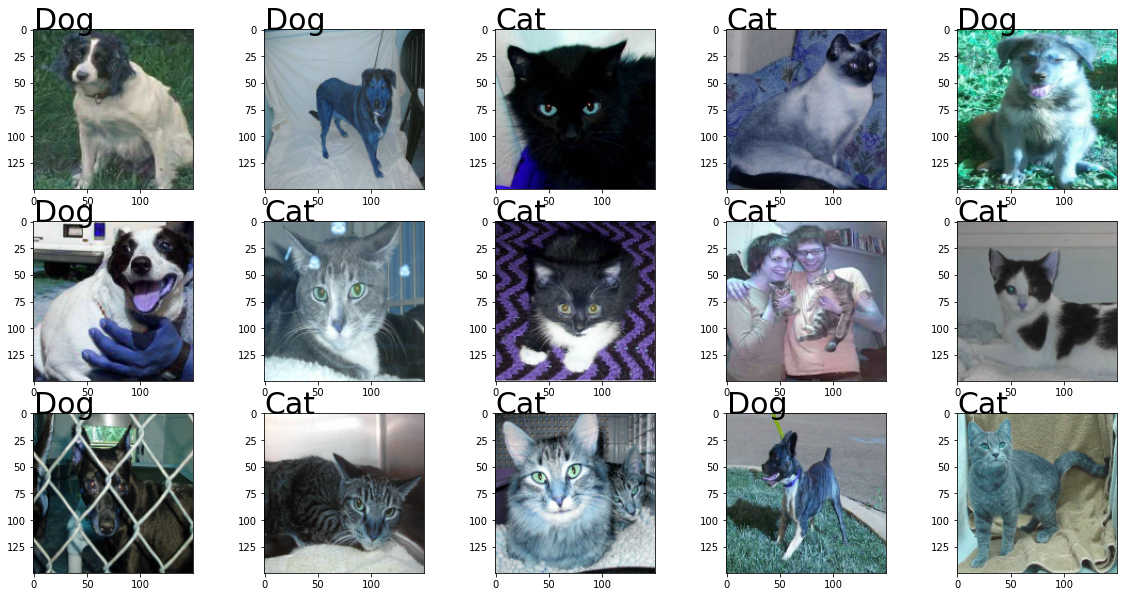

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))
for i in range(15):

    plt.subplot(3,5,i+1)
    random_num = np.random.randint(0,len(training_images))
    plt.imshow(training_images[random_num])
    
    if training_labels[random_num] == 0: text = "Cat"
    if training_labels[random_num] == 1: text = "Dog"
        
    plt.text(0,0,s=text,fontsize=30)

In [21]:
(x_train,y_train), (x_test,y_test) = load_data_training_and_test("cats_vs_dogs")

print(y_train.shape)

y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape) #1000 dogs and 1000 cats
print(y_train.shape)
print(x_test.shape) #500 dogs and 500 cats
print(y_test.shape)

(2000,)
(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)
